Basic usage aglcheck
===

In [1]:
# import modules and functions we need
from __future__ import print_function
%matplotlib inline
from IPython.core.display import HTML
from aglcheck import compare_sets, examplestringdata, get_examplestringdata, htmltables, \
    read_stringdata, StringData, plotting

Reading strings
---

Before we can do anything, we need to get the strings into a _StringData_ object. There are two ways of doing this.

1) Provide strings directly as a list of strings

In [5]:
sd = StringData(strings=['acf', 'acfc', 'acgf', 'acgfc', 'adcf'])
print(sd)

All:
    acf   : acf
    acfc  : acfc
    acgf  : acgf
    acgfc : acgfc
    adcf  : adcf




Note that the strings automaltically get labels that are identical to the strings themselves, since we didn't provide any different labels. However, it can be handy to use short labels to identify strings, like so:

In [10]:
sd = StringData(strings=[{'E1': 'acf'}, {'E2': 'acfc'}, {'E3': 'acgf'}, {'E4': 'acgfc'}])
print(sd)

All:
    E1 : acf
    E2 : acfc
    E3 : acgf
    E4 : acgfc




2) More often you will use a special text file (yaml format) that is human readable and writeable and that contains the string information. See '<a href="examplestringfilesimple.yaml">examplestringfilesimple.yaml</a>' for the simplest example that just contains a list of strings and that you can use as a template.

In [12]:
sd = read_stringdata('examplestringfilesimple.yaml')
print(sd)

All:
    acf    : acf
    acfc   : acfc
    acgf   : acgf
    acgfc  : acgfc
    adcf   : adcf
    adcfc  : adcfc
    adcfcg : adcfcg
    adcgf  : adcgf
    acgfcg : acgfcg
    acgfc  : acgfc
    adcfcg : adcfcg
    acfcg  : acfcg
    adcgfc : adcgfc
    afgcd  : afgcd
    afcdgc : afcdgc
    fadgc  : fadgc
    dcafgc : dcafgc




You can provide more information of the stringsets in such a file, for example descriptive string labels. And also string categories that can be used in comparisons. See for examle '<a href="examplestringfile.yaml">examplestringfile.yaml</a>', which you can use as a template.

In [13]:
sd = read_stringdata('examplestringfile.yaml')
print(sd)

All:
    E1  : acf
    E2  : acfc
    E3  : acgf
    E4  : acgfc
    E5  : adcf
    E6  : adcfc
    E7  : adcfcg
    E8  : adcgf
    E9  : acgfcg
    CT1 : acgfc
    CT2 : adcfcg
    CT3 : acfcg
    CT4 : adcgfc
    VT1 : afgcd
    VT2 : afcdgc
    VT3 : fadgc
    VT4 : dcafgc

Exposure: [E1, E2, E3, E4, E5, E6, E7, E8, E9]

Test: [CT1, CT2, CT3, CT4, VT1, VT2, VT3, VT4]

CorrectTest: [CT1, CT2, CT3, CT4]

ViolatingTest: [VT1, VT2, VT3, VT4]




Comparing strings
---

Next, we want to compare the strings in the data set, using a comparison function. For example, we want to look for the longest shared substrings.

In [14]:
cm = compare_sets.longestsharedsubstringlength(sd)

The object that was returned, a ComparisonMatrix, can be used for different things, such as direct visualization of the results in an image plot:

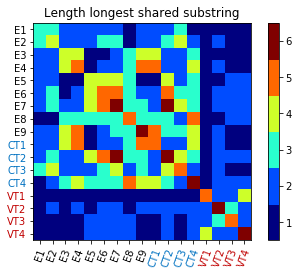

In [15]:
ax = plotting.plot_comparison(cm)

You can also compare only specific string categories as long as they are defined in the stringdata:

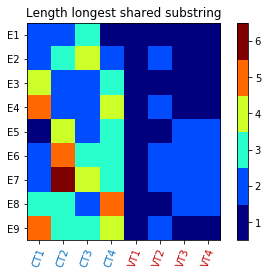

In [17]:
cm = compare_sets.longestsharedsubstringlength(sd, comparison=('Test', 'Exposure'))
ax = plotting.plot_comparison(cm)

Or to get the results as a matrix that can be used for further evaluations:

In [19]:
cm.get_matrix()

[[2, 2, 4, 5, 1, 2, 2, 3, 5],
 [2, 3, 2, 2, 4, 5, 6, 3, 3],
 [3, 4, 2, 2, 2, 3, 4, 2, 3],
 [1, 2, 3, 4, 3, 3, 3, 5, 4],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 2, 1, 2, 1, 2, 2, 1, 2],
 [1, 1, 1, 1, 2, 2, 2, 2, 1],
 [1, 1, 1, 1, 2, 2, 2, 2, 1]]

The order of the rows and columns correspond to the sequence of strings in the StringData object

In [20]:
sd.strings

['acf',
 'acfc',
 'acgf',
 'acgfc',
 'adcf',
 'adcfc',
 'adcfcg',
 'adcgf',
 'acgfcg',
 'acgfc',
 'adcfcg',
 'acfcg',
 'adcgfc',
 'afgcd',
 'afcdgc',
 'fadgc',
 'dcafgc']

Alternatively, you want an HTML table that highlights the longest shared substrings. The returned HTML code can be written to file or shown in a notebook. To do the latter use the ipython HTML function. 

In [21]:
htmlcode = htmltables.longestsharedsubstringstable(sd) 
HTML(htmlcode)

,E1acf,E2acfc,E3acgf,E4acgfc,E5adcf,E6adcfc,E7adcfcg,E8adcgf,E9acgfcg,CT1acgfc,CT2adcfcg,CT3acfcg,CT4adcgfc,VT1afgcd,VT2afcdgc,VT3fadgc,VT4dcafgc
E1acf,acf acf,acf acfc,acf acgf,acf acgfc,acf adcf,acf adcfc,acf adcfcg,acf adcgfacf adcgfacf adcgf,acf acgfcg,acf acgfc,acf adcfcg,acf acfcg,acf adcgfcacf adcgfcacf adcgfcacf adcgfc,acf afgcdacf afgcdacf afgcd,acf afcdgcacf afcdgcacf afcdgcacf afcdgc,acf fadgcacf fadgcacf fadgc,acf dcafgcacf dcafgcacf dcafgcacf dcafgc
E2acfc,acfc acf,acfc acfc,acfc acgf,acfc acgfcacfc acgfc,acfc adcf,acfc adcfc,acfc adcfcg,acfc adcgfacfc adcgfacfc adcgfacfc adcgf,acfc acgfcgacfc acgfcg,acfc acgfcacfc acgfc,acfc adcfcg,acfc acfcg,acfc adcgfc,acfc afgcdacfc afgcdacfc afgcdacfc afgcd,acfc afcdgc,acfc fadgcacfc fadgcacfc fadgcacfc fadgc,acfc dcafgcacfc dcafgcacfc dcafgcacfc dcafgcacfc dcafgcacfc dcafgc
E3acgf,acgf acf,acgf acfc,acgf acgf,acgf acgfc,acgf adcfacgf adcfacgf adcf,acgf adcfcacgf adcfcacgf adcfcacgf adcfc,acgf adcfcg,acgf adcgf,acgf acgfcg,acgf acgfc,acgf adcfcg,acgf acfcgacgf acfcg,acgf adcgfc,acgf afgcdacgf afgcdacgf afgcdacgf afgcd,acgf afcdgcacgf afcdgcacgf afcdgcacgf afcdgcacgf afcdgc,acgf fadgcacgf fadgcacgf fadgcacgf fadgc,acgf dcafgcacgf dcafgcacgf dcafgcacgf dcafgcacgf dcafgc
E4acgfc,acgfc acf,acgfc acfcacgfc acfc,acgfc acgf,acgfc acgfc,acgfc adcfacgfc adcfacgfc adcfacgfc adcf,acgfc adcfc,acgfc adcfcgacgfc adcfcg,acgfc adcgf,acgfc acgfcg,acgfc acgfc,acgfc adcfcgacgfc adcfcg,acgfc acfcgacgfc acfcgacgfc acfcg,acgfc adcgfc,acgfc afgcdacgfc afgcdacgfc afgcdacgfc afgcdacgfc afgcd,acgfc afcdgc,acgfc fadgcacgfc fadgcacgfc fadgcacgfc fadgcacgfc fadgc,acgfc dcafgcacgfc dcafgcacgfc dcafgcacgfc dcafgcacgfc dcafgcacgfc dcafgcacgfc dcafgc
E5adcf,adcf acf,adcf acfc,adcf acgfadcf acgfadcf acgf,adcf acgfcadcf acgfcadcf acgfcadcf acgfc,adcf adcf,adcf adcfc,adcf adcfcg,adcf adcgf,adcf acgfcgadcf acgfcgadcf acgfcgadcf acgfcg,adcf acgfcadcf acgfcadcf acgfcadcf acgfc,adcf adcfcg,adcf acfcg,adcf adcgfc,adcf afgcdadcf afgcdadcf afgcdadcf afgcd,adcf afcdgcadcf afcdgcadcf afcdgcadcf afcdgcadcf afcdgc,adcf fadgc,adcf dcafgc
E6adcfc,adcfc acf,adcfc acfc,adcfc acgfadcfc acgfadcfc acgfadcfc acgf,adcfc acgfc,adcfc adcf,adcfc adcfc,adcfc adcfcg,adcfc adcgf,adcfc acgfcg,adcfc acgfc,adcfc adcfcg,adcfc acfcg,adcfc adcgfc,adcfc afgcdadcfc afgcdadcfc afgcdadcfc afgcdadcfc afgcd,adcfc afcdgc,adcfc fadgc,adcfc dcafgc
E7adcfcg,adcfcg acf,adcfcg acfc,adcfcg acgf,adcfcg acgfcadcfcg acgfc,adcfcg adcf,adcfcg adcfc,adcfcg adcfcg,adcfcg adcgf,adcfcg acgfcg,adcfcg acgfcadcfcg acgfc,adcfcg adcfcg,adcfcg acfcg,adcfcg adcgfc,adcfcg afgcdadcfcg afgcdadcfcg afgcdadcfcg afgcdadcfcg afgcdadcfcg afgcd,adcfcg afcdgc,adcfcg fadgc,adcfcg dcafgc
E8adcgf,adcgf acfadcgf acfadcgf acf,adcgf acfcadcgf acfcadcgf acfcadcgf acfc,adcgf acgf,adcgf acgfc,adcgf adcf,adcgf adcfc,adcgf adcfcg,adcgf adcgf,adcgf acgfcg,adcgf acgfc,adcgf adcfcg,adcgf acfcg,adcgf adcgfc,adcgf afgcdadcgf afgcdadcgf afgcdadcgf afgcdadcgf afgcd,adcgf afcdgcadcgf afcdgcadcgf afcdgcadcgf afcdgcadcgf afcdgcadcgf afcdgc,adcgf fadgc,adcgf dcafgc
E9acgfcg,acgfcg acf,acgfcg acfcacgfcg acfc,acgfcg acgf,acgfcg acgfc,acgfcg adcfacgfcg adcfacgfcg adcfacgfcg adcf,acgfcg adcfc,acgfcg adcfcg,acgfcg adcgf,acgfcg acgfcg,acgfcg acgfc,acgfcg adcfcg,acgfcg acfcg,acgfcg adcgfc,acgfcg afgcdacgfcg afgcdacgfcg afgcdacgfcg afgcdacgfcg afgcdacgfcg afgcd,acgfcg afcdgc,acgfcg fadgcacgfcg fadgcacgfcg fadgcacgfcg fadgcacgfcg fadgcacgfcg fadgc,acgfcg dcafgcacgfcg dcafgcacgfcg dcafgcacgfcg dcafgcacgfcg dcafgcacgfcg dcafgcacgfcg dcafgcacgfcg dcafgc
CT1acgfc,acgfc acf,acgfc acfcacgfc acfc,acgfc acgf,acgfc acgfc,acgfc adcfacgfc adcfacgfc adcfacgfc adcf,acgfc adcfc,acgfc adcfcgacgfc adcfcg,acgfc adcgf,acgfc acgfcg,acgfc acgfc,acgfc adcfcgacgfc adcfcg,acgfc acfcgacgfc acfcgacgfc acfcg,acgfc adcgfc,acgfc afgcdacgfc afgcdacgfc afgcdacgfc afgcdacgfc afgcd,acgfc afcdgc,acgfc fadgcacgfc fadgcacgfc fadgcacgfc fadgcacgfc fadgc,acgfc dcafgcacgfc dcafgcacgfc dcafgcacgfc dcafgcacgfc dcafgcacgfc dcafgcacgfc dcafgc


If you want to save the html to a file, you can use the 'htmltables.save_html' function. The parameter 'include_doctags' determines, if you want to make it a full html document that can be opened in a browser, or just the table html code itself.

In [22]:
htmltables.save_html(htmlcode=htmlcode, filename='exampletable.html', include_doctags=True)

Other comparisons
-------------------

We looked at the 'longestsharedsubstrings' functions above, but we can look at different kinds of similarities between string sets.

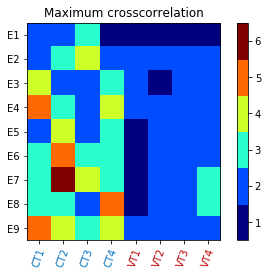

In [23]:
cm = compare_sets.crosscorrelationmax(sd, comparison=('Test', 'Exposure'))
ax = plotting.plot_comparison(cm)

Available comparison functions for plotting
-------------------------------------------------

In [28]:
compare_sets.availableanalysisfunctions.keys()

dict_keys(['crosscorrelationmax', 'sharedlengthnsubstringcount', 'longestsharedsubstringlength', 'longestsharedsubstringduration', 'novellengthnsubstringcount', 'commonstartduration', 'commonstartlength', 'issubstring', 'issame', 'samestart', 'levenshtein'])

Available comparison functions for tables
-----------------------------------------------

In [29]:
htmltables.availableanalysisfunctions.keys()

dict_keys(['crosscorrelationmaxtable', 'issubstringtable', 'longestsharedsubstringstable', 'startswithtable'])